In [298]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import socket
from urllib3.connection import HTTPConnection
import nltk    #NLTK for description preprocessing
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from lxml import html

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [299]:
HTTPConnection.default_socket_options = (
    HTTPConnection.default_socket_options + [
        (socket.SOL_SOCKET, socket.SO_KEEPALIVE, 1),
        (socket.SOL_TCP, socket.TCP_KEEPIDLE, 45),
        (socket.SOL_TCP, socket.TCP_KEEPINTVL, 10),
        (socket.SOL_TCP, socket.TCP_KEEPCNT, 6)
    ] )

In [300]:
s = HTMLSession()

r = s.get('https://millercenter.org/the-presidency/presidential-speeches?field_president_target_id[43]=43')




soup= BeautifulSoup(r.text,'html.parser')


discursos = []
titulo= []
for speach in soup.find_all('div',class_='views-row') :
    link = speach.a.get('href')
    print(link)

    full_link = 'https://millercenter.org'+str(link)
    

    r_=s.get(full_link)
    
    soup_ =BeautifulSoup(r_.text,'html.parser')

    title = soup_.find('h2',class_='presidential-speeches--title').span.text
    
    titulo.append(title)

    full_discurso = soup_.find('div',class_= 'view-transcript')
    
    total = full_discurso.find_all('p')

    

    total = [elem.get_text() for elem in total]

    #taking out the list of list

    discursos.append(total)
    
    

/the-presidency/presidential-speeches/may-15-2016-commencement-address-rutgers-university
/the-presidency/presidential-speeches/march-22-2016-remarks-people-cuba
/the-presidency/presidential-speeches/january-12-2016-2016-state-union-address
/the-presidency/presidential-speeches/june-26-2015-remarks-eulogy-honorable-reverend-clementa
/the-presidency/presidential-speeches/march-7-2015-remarks-50th-anniversary-selma-marches
/the-presidency/presidential-speeches/january-20-2015-2015-state-union-address
/the-presidency/presidential-speeches/november-20-2014-address-nation-immigration
/the-presidency/presidential-speeches/january-28-2014-2014-state-union-address
/the-presidency/presidential-speeches/december-4-2013-speech-economic-mobility
/the-presidency/presidential-speeches/september-10-2013-address-nation-syria
/the-presidency/presidential-speeches/july-24-2013-remarks-education-and-economy
/the-presidency/presidential-speeches/july-19-2013-remarks-trayvon-martin


In [331]:



part='https://millercenter.org'
url=part+str('/the-presidency/presidential-speeches/august-28-2008-acceptance-speech-democratic-national')




def url_page(url):
    titulo=[]
    discursos=[]
    response = requests.get(url)
    #create the soup
    soup = BeautifulSoup(response.text,'lxml')


    #take the title
    title = soup.find('h2', class_='presidential-speeches--title').span.text
    titulo.append(title)

    #go for text
    discurso = soup.find('div',class_='presidential-speeches--body-wrapper')
    text=discurso.find('div',class_='view-transcript').p.text
    discursos.append(text)

    #go to next page
    proximo_link= discurso.find('div',class_='views-row')
    prx_link= proximo_link.find('a')['href']

    return (titulo,discursos,prx_link)


print(url_page(url))
    

(['August 28, 2008: Acceptance Speech at the Democratic National Convention'], ['To Chairman Dean and my great friend Dick Durbin; and to all my fellow citizens of this great nation;\n\nWith profound gratitude and great humility, I accept your nomination for the presidency of the United States.\n\nLet me express my thanks to the historic slate of candidates who accompanied me on this journey, and especially the one who traveled the farthest—a champion for working Americans and an inspiration to my daughters and to yours—Hillary Rodham Clinton. To President Clinton, who last night made the case for change as only he can make it; to Ted Kennedy, who embodies the spirit of service; and to the next Vice President of the United States, Joe Biden, I thank you. I am grateful to finish this journey with one of the finest statesmen of our time, a man at ease with everyone from world leaders to the conductors on the Amtrak train he still takes home every night.\n\nTo the love of my life, our nex

In [336]:
print(url_page(part+prx_link))

(['November 4, 2008: Remarks on Election Night'], ['If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy, tonight is your answer.\n\nIt\'s the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voice could be that difference.\n\nIt\'s the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Latino, Asian, Native American, gay, straight, disabled and not disabled—Americans who sent a message to the world that we have never been a collection of Red States and Blue States: we are, and always will be, the United States of America.\n\nIt\'s the answer that led those who have been told for

In [334]:
for i in part+str(prx_link):
    print(url_page(i))

MissingSchema: Invalid URL 'h': No scheme supplied. Perhaps you meant http://h?

In [ ]:
res = [''.join(ele) for ele in discursos]

len(res)

12

In [ ]:
len(res)

12

In [ ]:
titulo

['May 15, 2016: Commencement Address at Rutgers University',
 'March 22, 2016: Remarks to the People of Cuba',
 'January 12, 2016: 2016 State of the Union Address',
 'June 26, 2015: Remarks in Eulogy for the Honorable Reverend Clementa Pickney',
 'March 7, 2015: Remarks at the 50th Anniversary of the Selma Marches',
 'January 20, 2015: 2015 State of the Union Address',
 'November 20, 2014: Address to the Nation on Immigration',
 'January 28, 2014: 2014 State of the Union Address',
 'December 4, 2013: Speech on Economic Mobility',
 'September 10, 2013: Address to the Nation on Syria',
 'July 24, 2013: Remarks on Education and the Economy',
 'July 19, 2013: Remarks on Trayvon Martin']

In [ ]:
fecha = [i.split(':')[0] for i in titulo]

discursos_titulo = [i.split(':')[1] for i in titulo]

In [ ]:
df = pd.DataFrame({'titulo':discursos_titulo,'fecha':fecha,'discurso':res})

In [ ]:
df['discurso'] = df['discurso'].astype(str).str.lower()

In [ ]:
regexp = RegexpTokenizer('\w+') #tokenization with regular expression

df['discurso_tokenizado']=df['discurso'].apply(regexp.tokenize)

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = ['one','four','five','six','make','much','time','ago','want','thank','even','never','seen','greatest','applause','bless','every','tight','going','said','knit',
'every','tight','going','said','knit','lot','little','know','say','thing','many','actually','think','look','things','happen','talking','take',
'saying','lose','came','still']

stopwords.extend(new_stopwords)

In [ ]:
df['discurso_tokenizado'] = df['discurso_tokenizado'].apply(lambda x: [item for item in x if item not in stopwords]) 

df['text_string'] = df['discurso_tokenizado'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [ ]:
all_words = ' '.join([word for word in df['text_string']])

all_words = re.sub(r'\b(\w+\s*)\1{1,}', '\\1', all_words)

In [ ]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

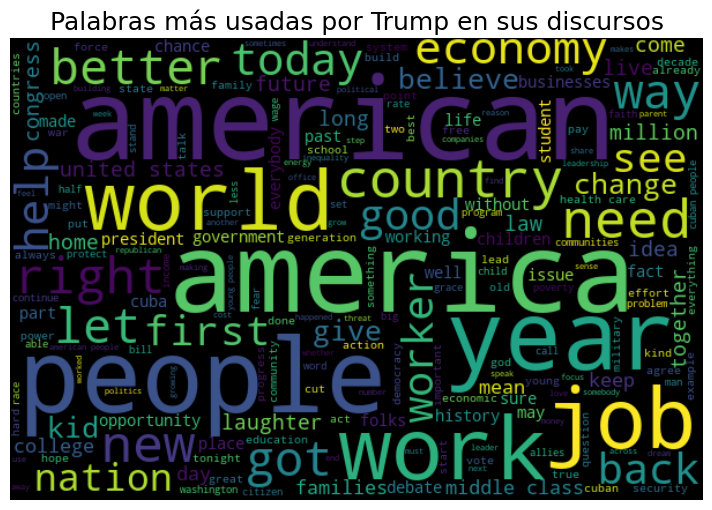

In [ ]:
from wordcloud import WordCloud #Wordclud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                    background_color='black',
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 6))
plt.title("Palabras más usadas por Trump en sus discursos",fontsize= 18)
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.savefig('wordcloud.jpg', bbox_inches='tight')
plt.show();

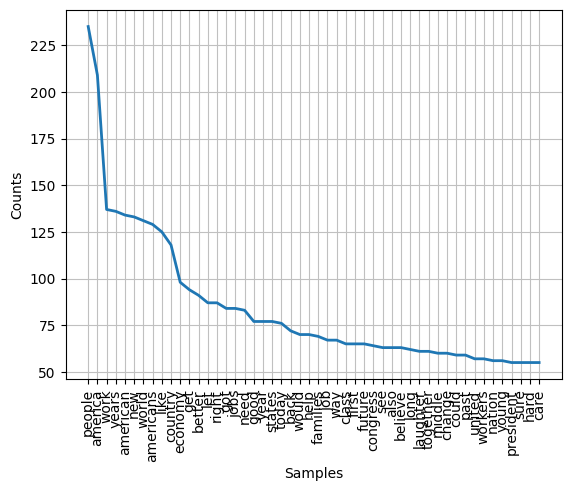

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist.plot(50)

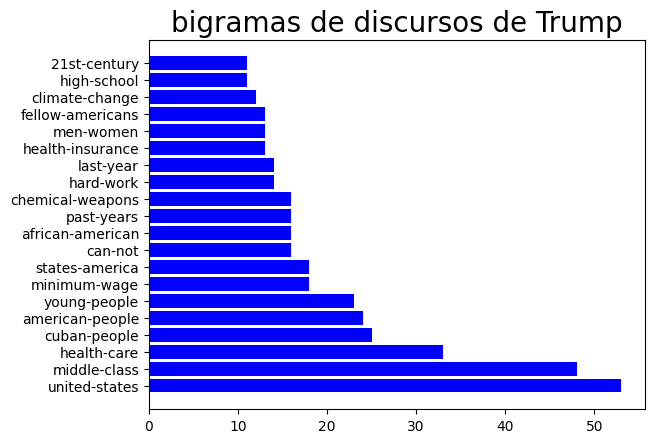

In [ ]:
from nltk.util import ngrams

bigrams=ngrams(tokenized_words,2)

tokenized_bg = nltk.FreqDist(bigrams)

plot =tokenized_bg.most_common(20)

wrds = ['-'.join(x) for x, c in plot]

wdth = [c for x, c in plot]

plt.title('bigramas de discursos de Trump',fontsize=20)

plt.barh(wrds, wdth, color='blue')

plt.savefig('bigrams_trump.jpg',bbox_inches='tight')
plt.show()

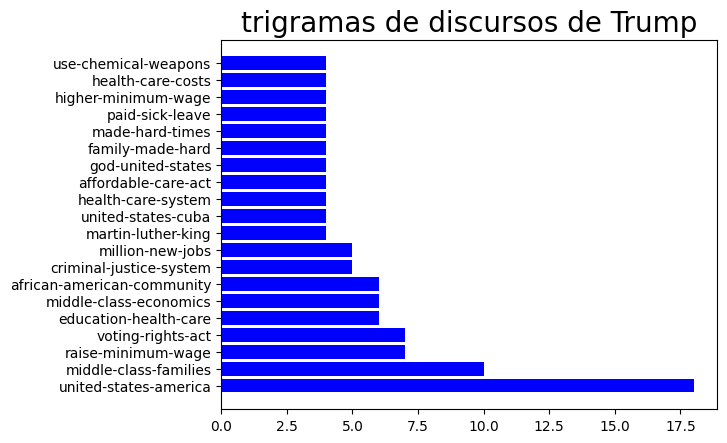

In [ ]:
trigrams=ngrams(tokenized_words,3)

tokenized_tri = nltk.FreqDist(trigrams)

plot =tokenized_tri.most_common(21)
plot.remove((('strong', 'family', 'made'), 4))

wrds = ['-'.join(x) for x, c in plot]

wdth = [c for x, c in plot]

plt.title('trigramas de discursos de Trump',fontsize=20)

plt.barh(wrds, wdth, color='blue')

plt.savefig('trigramas_trump.jpg',bbox_inches='tight')
plt.show()

In [ ]:
plot

[(('united', 'states', 'america'), 18),
 (('middle', 'class', 'families'), 10),
 (('raise', 'minimum', 'wage'), 7),
 (('voting', 'rights', 'act'), 7),
 (('education', 'health', 'care'), 6),
 (('middle', 'class', 'economics'), 6),
 (('african', 'american', 'community'), 6),
 (('criminal', 'justice', 'system'), 5),
 (('million', 'new', 'jobs'), 5),
 (('martin', 'luther', 'king'), 4),
 (('united', 'states', 'cuba'), 4),
 (('health', 'care', 'system'), 4),
 (('affordable', 'care', 'act'), 4),
 (('god', 'united', 'states'), 4),
 (('strong', 'family', 'made'), 4),
 (('family', 'made', 'hard'), 4),
 (('made', 'hard', 'times'), 4),
 (('paid', 'sick', 'leave'), 4),
 (('higher', 'minimum', 'wage'), 4),
 (('health', 'care', 'costs'), 4)]